In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("booksENG_ref.csv")
df.head()

title  average_rating  \
0                               A Christmas Carol            4.05   
1                                        Creepers            3.66   
2      A Circle of Quiet (Crosswicks Journals #1)            4.21   
3  The Last Shot: City Streets  Basketball Dreams            4.17   
4                 A Theory of Fun for Game Design            3.94   

  language_code  num_pages  ratings_count  text_reviews_count  \
0         en-CA        160           4359                 353   
1         en-CA        388           4513                 515   
2         en-CA        246           5236                 506   
3         en-CA        233           5106                 155   
4         en-CA        256           2113                 181   

          publisher  Bookauthor_no    Bookauthor_Main Bookauthor_Co1  \
0  Candlewick Press              2    Charles Dickens     P.J. Lynch   
1         CDS Books              1      David Morrell              0   
2         HarperOne              1  Madeleine L'Engle              0   
3     Mariner Books              1         Darcy Frey              0   
4   Paraglyph Press              2        Raph Koster    Will Wright   

  Bookauthor_Co2  Age_years  title_nwords  
0              0         14             3  
1              0         15             1  
2              0         36             7  
3              0         16             8  
4              0         16             7

In [3]:
df.describe()

average_rating     num_pages  ratings_count  text_reviews_count  \
count    10477.000000  10477.000000   1.047700e+04        10477.000000   
mean         3.940456    335.942064   1.890113e+04          572.456715   
std          0.295134    242.658430   1.157175e+05         2651.112491   
min          1.000000      0.000000   1.000000e+00            0.000000   
25%          3.770000    195.000000   1.370000e+02           11.000000   
50%          3.960000    299.000000   8.840000e+02           54.000000   
75%          4.130000    416.000000   5.593000e+03          260.000000   
max          5.000000   6576.000000   4.597666e+06        94265.000000   

       Bookauthor_no     Age_years  title_nwords  
count   10477.000000  10477.000000  10477.000000  
mean        1.730934     19.824282      6.275461  
std         1.845723      8.123213      4.114357  
min         1.000000      0.000000      1.000000  
25%         1.000000     15.000000      3.000000  
50%         1.000000     17.000000      5.000000  
75%         2.000000     22.000000      8.000000  
max        51.000000    120.000000     43.000000

histogram to check for normalisation, need 

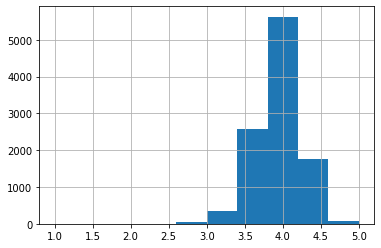

In [4]:
df.average_rating.hist()

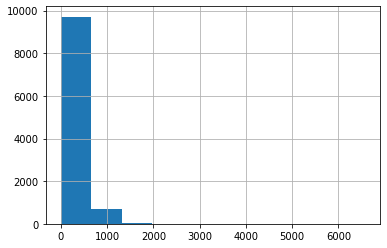

In [5]:
df.num_pages.hist()

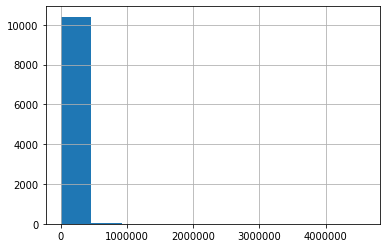

In [6]:
df.ratings_count.hist()

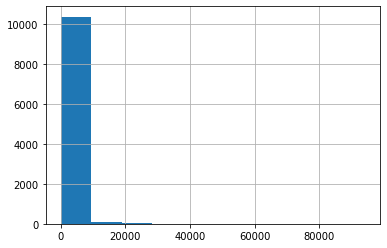

In [7]:
df.text_reviews_count.hist()

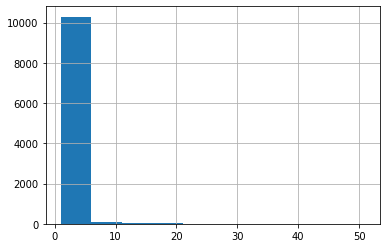

In [8]:
df.Bookauthor_no.hist()

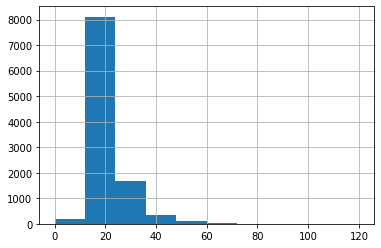

In [9]:
df.Age_years.hist()

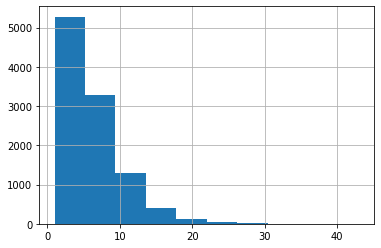

In [10]:
df.title_nwords.hist()

In [11]:
df.columns

Index(['title', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publisher', 'Bookauthor_no',
       'Bookauthor_Main', 'Bookauthor_Co1', 'Bookauthor_Co2', 'Age_years',
       'title_nwords'],
      dtype='object')

In [12]:
df[['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count', 'Bookauthor_no', 'Age_years','title_nwords']].corr()

average_rating  num_pages  ratings_count  \
average_rating            1.000000   0.177101       0.043497   
num_pages                 0.177101   1.000000       0.034812   
ratings_count             0.043497   0.034812       1.000000   
text_reviews_count        0.036634   0.037896       0.866035   
Bookauthor_no             0.027702  -0.011050      -0.020759   
Age_years                 0.041937   0.024698      -0.046028   
title_nwords              0.143304   0.036844      -0.026064   

                    text_reviews_count  Bookauthor_no  Age_years  title_nwords  
average_rating                0.036634       0.027702   0.041937      0.143304  
num_pages                     0.037896      -0.011050   0.024698      0.036844  
ratings_count                 0.866035      -0.020759  -0.046028     -0.026064  
text_reviews_count            1.000000      -0.036646  -0.069525     -0.041830  
Bookauthor_no                -0.036646       1.000000  -0.000550      0.017265  
Age_years                    -0.069525      -0.000550   1.000000     -0.037355  
title_nwords                 -0.041830       0.017265  -0.037355      1.000000

In [13]:
corr = df[['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count', 'Bookauthor_no', 'Age_years','title_nwords']].corr()

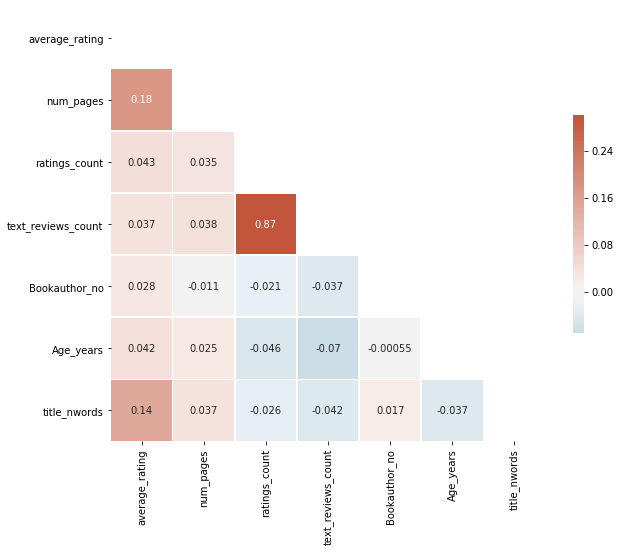

In [14]:
f, ax = plt.subplots(figsize=(10, 8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap,square=True,vmax=0.3,center=0,linewidths=0.5,cbar_kws={'shrink':0.5})

In [15]:
df.columns

Index(['title', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publisher', 'Bookauthor_no',
       'Bookauthor_Main', 'Bookauthor_Co1', 'Bookauthor_Co2', 'Age_years',
       'title_nwords'],
      dtype='object')

graph for language_code: total = 5


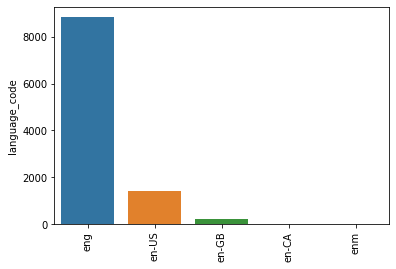

In [99]:
cat_num = df['language_code'].value_counts()
print("graph for %s: total = %d" %('language_code',len(cat_num)))
chart = sns.barplot(x = cat_num.index,y=cat_num)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

graph for publisher 


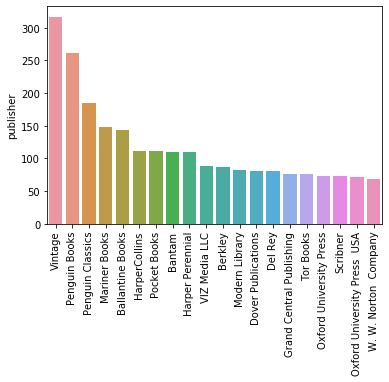

graph for Bookauthor_Main 


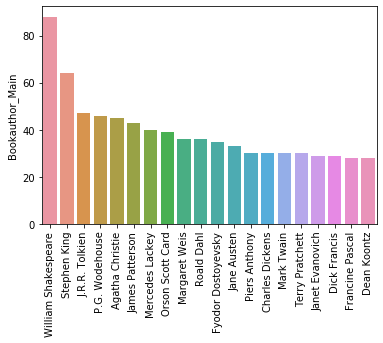

In [96]:
for i in df_cat[['publisher','Bookauthor_Main']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s "%(i))
    chart = sns.barplot(x = cat_num.index,y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [50]:
df['Bookauthor_Co2'].value_counts()[:20]

0                          9064
Larissa Volokhonsky          14
Steve Pieczenik              11
Richmond Lattimore           10
CliffsNotes                   8
Paul Werstine                 8
Rodney Ramos                  7
John Steven Gurney            6
Terence Kilmartin             6
John Updike                   5
Bernard Knox                  5
A.R. Braunmuller              4
R.W. Alley                    4
Hablot Knight Browne          4
Tom Clancy                    4
Christopher Prendergast       4
Matthew L. Sands              4
Arthur Rackham                3
Mark Buckingham               3
Herman Melville               3
Name: Bookauthor_Co2, dtype: int64

In [49]:
df['Bookauthor_Co1'].value_counts()[:20]

0                        6232
Tracy Hickman              27
Quentin Blake              18
Christopher Tolkien        16
Dick Hill                  16
Sandra Brown               16
Garth Williams             15
Richard Pevear             15
Kate William               15
Tom Clancy                 14
Takeshi Obata              14
Constance Garnett          13
Akira Watanabe             13
Margaret Sayers Peden      11
Christopher Hitchens       10
CliffsNotes                10
David Grene                10
William Weaver             10
Renée Graef                 9
C.K. Scott Moncrieff        9
Name: Bookauthor_Co1, dtype: int64

In [48]:
df['title'].value_counts()[:20]

Mo                            10
The Brothers Karamazov         9
The Iliad                      9
Gulliver's Travels             8
Anna Karenina                  8
The Odyssey                    8
'Salem's Lot                   8
Ru                             7
A Midsummer Night's Dream      7
The Picture of Dorian Gray     7
The Histories                  6
The Scarlet Letter             6
The Great Gats                 6
Robinson Crusoe                6
Macbeth                        6
Romeo and Juliet               6
The Secret Garden              6
Collected Stories              6
Sense and Sensibility          6
Treasure Island                6
Name: title, dtype: int64

In [47]:
df.columns

Index(['title', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publisher', 'Bookauthor_no',
       'Bookauthor_Main', 'Bookauthor_Co1', 'Bookauthor_Co2', 'Age_years',
       'title_nwords'],
      dtype='object')

In [60]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [63]:
pd.pivot_table(df,index = ['title','language_code'],values = 'average_rating').sort_values('average_rating',ascending=False)

average_rating
title                                              language_code                
Colossians and Philemon: A Critical and Exegeti... eng                  5.000000
The Goon Show  Volume 11: He's Fallen in the Wa... eng                  5.000000
Fanning the Flame: Bible  Cross  and Mission       eng                  5.000000
Taxation of Mineral Rents                          eng                  5.000000
Bulgakov's the Master and Margarita: The Text a... eng                  5.000000
Middlesex Borough (Images of America: New Jersey)  eng                  5.000000
The Diamond Color Meditation: Color Pathway to ... eng                  5.000000
The Irish Anatomist: A Study of Flann O'Brien      eng                  5.000000
Tyrannosaurus Wrecks (Stanley  #1)                 eng                  5.000000
Literature Circle Guide: Bridge to Terabithia: ... eng                  5.000000
Zone of the Enders: The 2nd Runner Official Str... eng                  5.000000
The Complete Theory Fun Factory: Music Theory P... eng                  5.000000
Oliver Wendell Holmes in Paris: Medicine  Theol... eng                  5.000000
His Princess Devotional: A Royal Encounter With... eng                  5.000000
The Goon Show  Volume 4: My Knees Have Fallen Off! eng                  5.000000
The New Big Book of America                        eng                  5.000000
Winchester Shotguns                                eng                  5.000000
Willem de Kooning: Late Paintings                  eng                  5.000000
Existential Meditation                             eng                  4.910000
Little Big Book for God's Children                 en-US                4.880000
Stargirl LitPlans on CD                            eng                  4.860000
Corvette                                           eng                  4.830000
The Complete Calvin and Hobbes                     eng                  4.820000
The Feynman Lectures on Physics Vols 7-8           en-US                4.800000
Harry Potter Boxed Set  Books 1-5 (Harry Potter... eng                  4.780000
It's a Magical World (Calvin and Hobbes  #11)      eng                  4.760000
The John Deere Two-Cylinder Tractor Encyclopedi... eng                  4.750000
True Harvest: Readings From Henry David Thoreau... eng                  4.750000
Early Color                                        eng                  4.730000
Harry Potter Collection (Harry Potter  #1-6)       eng                  4.730000
Homicidal Psycho Jungle Cat (Calvin and Hobbes #9) eng                  4.720000
Elliott Erwitt: Snaps                              en-GB                4.720000
The Beatles' Story on Capitol Records  Part Two... eng                  4.720000
Calvin and Hobbes: Sunday Pages 1985-1995: An E... eng                  4.710000
The Feynman Lectures on Physics Vols 3-4           en-US                4.710000
The Complete Aubrey/Maturin Novels (5 Volumes)     eng                  4.700000
The Price of the Ticket: Collected Nonfiction  ... eng                  4.700000
Study Bible: NIV                                   eng                  4.700000
The 5 Love Languages / The 5 Love Languages Jou... eng                  4.700000
Cook's Illustrated 2003 (Cook's Illustrated Ann... eng                  4.690000
The Sibley Field Guide to Birds of Western Nort... en-US                4.690000
The Days Are Just Packed                           eng                  4.690000
A Wife After God's Own Heart Growth and Study G... eng                  4.690000
Code Check Electrical: An Illustrated Guide to ... eng                  4.670000
Empire 2.0: A Modest Proposal for a United Stat... eng                  4.670000
The Life and Times of Scrooge McDuck               eng                  4.670000
Falling Angels (Luc Actar #1)                      eng                  4.670000
Restless Till We Rest in You: 60 Reflections fr... eng                  4.670000
Getting a Grip o

In [73]:
pd.pivot_table(df,index = ['publisher'],values = 'average_rating',aggfunc='mean').sort_values('average_rating',ascending=False)

average_rating
publisher                                                         
Chartwell Books                                           5.000000
T&T Clark Int'l                                           5.000000
University Press of New England                           5.000000
Square One Publishers                                     5.000000
Courage Books                                             5.000000
Academica Press                                           5.000000
Boosey & Hawkes Inc                                       5.000000
Vantage Press                                             5.000000
Schirmer Mosel                                            5.000000
Welcome Books                                             4.880000
Teacher's Pet Publications                                4.860000
Universe Publishing(NY)                                   4.830000
Skinner House Books                                       4.750000
Steidl                                                    4.730000
Four Ninety-Eight Productions                             4.720000
Zondervan Publishing House                                4.700000
Boston Common Press                                       4.690000
Servant Publications                                      4.670000
Harrison House                                            4.670000
Time Warner Books UK                                      4.630000
Western Publishing Company  Golden Books                  4.620000
Pearson Education                                         4.620000
Library of America (NY)                                   4.610000
Fellowship for the Performance                            4.600000
Island Press                                              4.590000
Collins Modern Classics                                   4.590000
Penguin Classics Deluxe Edition                           4.580000
Readers Digest                                            4.580000
Barbour Books                                             4.580000
Rufus Publications                                        4.580000
Longmeadow Press                                          4.580000
Black Classic Press                                       4.560000
Bloomsbury UK                                             4.560000
Russell Enterprises                                       4.550000
Twin Palms Publishers                                     4.540000
CRC Press                                                 4.530000
Loeb Classical Library 443                                4.520000
Canadian Broadcasting Corporation (CBC Audio)             4.505000
Michael Joseph Ltd./Penguin Books Ltd.                    4.500000
Veritas Publishing                                        4.500000
Lone Oak Press                                            4.500000
A K PETERS                                                4.500000
Collection of Historical Scientific Instruments           4.500000
Booklocker.com  Inc.                                      4.500000
St. Augustines Press                                      4.500000
Bryn Mawr Commentaries                                    4.500000
Liguori Publications                                      4.490000
Crossing Press                                            4.490000
Peerage Books                                             4.480000
Hal Leonard Publishing Corporation                        4.475000
Westholme Publishing                                      4.470000
Smithsonian Books                                         4.470000
Sovereign World                                           4.460000
America's Test Kitchen                                    4.460000
Grove Weidenfeld                                          4.460000
Ash Tree Publishing                                       4.450000
Voyageur Press                                            4.450000
Alcoholics Anonymous World Services Inc                   4.450000
AA World Services               

In [79]:
pd.pivot_table(df[df['publisher'] == 'Vintage'],index = ['Bookauthor_no'],values = 'average_rating',aggfunc='mean').sort_values('average_rating',ascending=False)

average_rating
Bookauthor_no                
4                    4.075000
3                    4.031818
2                    3.949231
1                    3.877240
5                    3.750000
15                   3.400000

In [78]:
pd.pivot_table(df,index = ['Age_years'],values = 'average_rating',aggfunc='mean').sort_values('average_rating',ascending=False)

average_rating
Age_years                
92               4.340000
97               4.290000
77               4.210000
2                4.103333
65               4.080000
59               4.078000
54               4.073333
7                4.067857
4                4.065000
73               4.060000
51               4.048182
70               4.045000
35               4.036667
49               4.033636
45               4.033333
63               4.030000
46               4.027500
30               4.024348
53               4.023333
91               4.020000
36               4.017000
29               4.016233
6                4.015556
58               4.013333
43               4.010313
38               3.998636
39               3.998571
10               3.996571
37               3.995152
3                3.993333
60               3.990000
52               3.986667
28               3.985198
50               3.983077
62               3.980000
67               3.980000
27               3.979565
40               3.976923
47               3.972857
32               3.972568
24               3.971826
80               3.970000
31               3.969107
61               3.966000
34               3.964000
12               3.963478
107              3.960000
41               3.957500
25               3.955311
95               3.955000
16               3.948165
57               3.946250
42               3.945652
19               3.942323
9                3.939565
11               3.938250
18               3.937157
23               3.937096
5                3.936000
22               3.932145
26               3.931875
17               3.929953
15               3.929246
20               3.928909
8                3.925714
66               3.925000
21               3.924671
64               3.923333
14               3.919526
13               3.918367
1                3.918333
0                3.910000
68               3.905000
33               3.902289
120              3.880000
55               3.876667
44               3.872000
48               3.862000
56               3.813529
71               3.680000
85               3.630000
72               3.550000
89               2.750000

In [77]:
df.columns

Index(['title', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publisher', 'Bookauthor_no',
       'Bookauthor_Main', 'Bookauthor_Co1', 'Bookauthor_Co2', 'Age_years',
       'title_nwords'],
      dtype='object')

In [94]:
df_pivot = df[['title', 'publisher','Bookauthor_Main', 'Bookauthor_Co1', 'Bookauthor_Co2','title_nwords','language_code','average_rating']]

In [95]:
for i in df_pivot.columns:
    if i == 'average_rating': 
        continue
    print(i)
    print(pd.pivot_table(df_pivot,index = i,values = 'average_rating').sort_values('average_rating',ascending = False))

title
                                                    average_rating
title                                                             
Middlesex Borough (Images of America: New Jersey)         5.000000
The Goon Show  Volume 11: He's Fallen in the Wa...        5.000000
Tyrannosaurus Wrecks (Stanley  #1)                        5.000000
Willem de Kooning: Late Paintings                         5.000000
Winchester Shotguns                                       5.000000
Fanning the Flame: Bible  Cross  and Mission              5.000000
Literature Circle Guide: Bridge to Terabithia: ...        5.000000
Taxation of Mineral Rents                                 5.000000
The New Big Book of America                               5.000000
Colossians and Philemon: A Critical and Exegeti...        5.000000
His Princess Devotional: A Royal Encounter With...        5.000000
The Irish Anatomist: A Study of Flann O'Brien             5.000000
The Goon Show  Volume 4: My Knees Have Fallen Off!      

                                                    average_rating
publisher                                                         
Chartwell Books                                           5.000000
T&T Clark Int'l                                           5.000000
University Press of New England                           5.000000
Square One Publishers                                     5.000000
Courage Books                                             5.000000
Academica Press                                           5.000000
Boosey & Hawkes Inc                                       5.000000
Vantage Press                                             5.000000
Schirmer Mosel                                            5.000000
Welcome Books                                             4.880000
Teacher's Pet Publications                                4.860000
Universe Publishing(NY)                                   4.830000
Skinner House Books                                       4.75